In [16]:
import numpy as np
import matplotlib.pyplot as plt
from environment import Polynomial, Environment
from optimizer import OGD, BGD_1

In [17]:
T = 5000 # Time round
lr = 0.001 # Learning rate
N = 50 # size of available convex functions that environment can choose

[0, 15.37947853215896, 30.697500668103412, 45.95431198759263, 61.15015708904917, 76.2852795934803, 91.3599221483837, 106.37432643163773, 121.32873315537586, 136.22338206984594, 151.0585119672538, 165.8343606855916, 180.55116511245095, 195.20916118882056, 209.80858391286898, 224.34966734371213, 238.83264460516563, 253.25774788948235, 267.6252084610749, 281.93525666022344, 296.1881219067682, 310.3840327037877, 324.5232166412623, 338.60590039972277, 352.63230975388444, 366.60266957626686, 380.5172038407991, 394.3761356264102, 408.179687120606, 421.928079623031, 435.62153354901636, 449.2602684331134, 462.84450293261364, 476.37445483105387, 489.8503410417079, 503.2723776110642, 516.6407797222894, 529.9557616986781, 543.2175370070892, 556.4263182613678, 569.5823172257543, 582.6857448182792, 595.7368111141443, 608.7357253490911, 621.6826959227551, 634.5779304020067, 647.4216355242793, 660.2140172008832, 672.9552805203074, 685.6456297515072, 698.2852683471791, 710.8743989470228, 723.4132233809

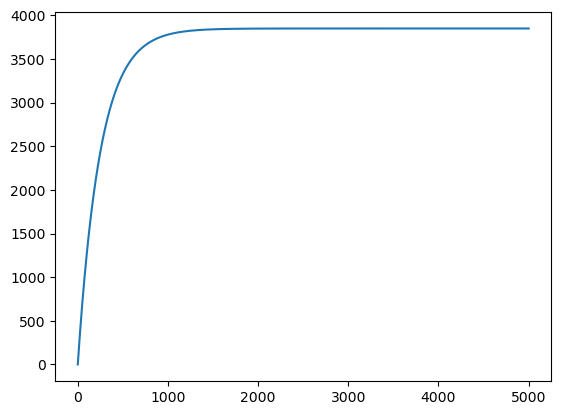

In [18]:
env = Environment(N)
ogd = OGD(lr=lr)
bgd_1 = BGD_1(lr=lr)
# bgd_2 = bgd_2()

x = np.random.random()
next_x=x
regret = [0]
xs = []

for t in range(T):
    env.choose_loss_ft(t)
    next_x=bgd_1.choose(env,x,t)
    regret.append(env.get_regret(t,next_x)+regret[t])
    xs.append(next_x)
    x=next_x


# plt.plot(loss)
plt.plot(regret)
plt.savefig('ex.png')


print(regret)

